In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X = pd.read_csv('../dataset/xdata.csv', header=None)
y = pd.read_csv('../dataset/ydata.csv', header=None)

X = X.drop(0, axis=1)
y = y.drop(0, axis=1)

X, y = X.values, y.values

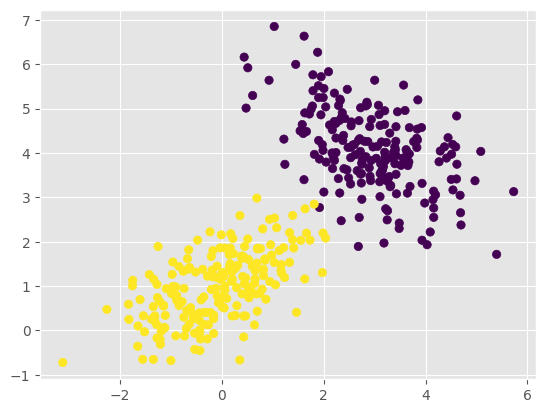

In [32]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1))
plt.show()

# Spliting

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=13)

In [34]:
import numpy as np

class KNNClassifierCode:

    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def distance_formula(self, p1, p2):
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

    def predict(self, p):
        distances = [] 
        for i in range(len(self.X)):
            distances.append((self.distance_formula(self.X[i], p), i))

        distances = sorted(distances, key=lambda x: x[0])
        points_with_distances = distances[:self.k]

        classes = []
        for dis, i in points_with_distances:
            classes.append(self.y[i])

        class_, counts = np.unique(classes, return_counts=True)

        ix = np.argmax(counts)
        pred = {'class': class_[ix], 'prob': np.max(counts) / np.sum(counts)}

        return pred

In [35]:
knn_cod = KNNClassifierCode(k=3)

knn_cod.fit(X_train, y_train)

In [41]:
pred = []
for i in range(len(X_test)):
    pred.append(knn_cod.predict(X_test[i])['class'])

In [42]:
y_test.reshape(-1) == pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [45]:
neigh.fit(X_train, y_train.values.ravel())

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [23]:
y_test[1].to_numpy().reshape(-1) == neigh.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,